In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as ans

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data=pd.read_excel("Online Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

# Clean the data

In [5]:
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
round(100*(data.isnull().sum())/len (data),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
data.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Prepare the data for modeling

In [9]:
data["amount"]=data["Quantity"]*data["UnitPrice"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
#monetry
grouped_data=data.groupby("CustomerID")["amount"].sum()
grouped_data=grouped_data.reset_index()
grouped_data.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [11]:
## frequency
frequency_data=data.groupby("CustomerID")["InvoiceDate"].count()
frequency_data=frequency_data.reset_index()
frequency_data.columns=["CustomerID","Frequency"]
frequency_data.head()


,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [12]:
grouped_data=pd.merge(grouped_data,frequency_data,on="CustomerID",how='inner')
grouped_data.head()

,CustomerID,amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [13]:
#recency
#date time conversion
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"],format="%d-%m-%Y %H:%M")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   amount       541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [14]:
#find max date
max_date=max(data["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
#compute the differnce
data["diff"]=max_date-data["InvoiceDate"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [17]:
last_purchase=data.groupby("CustomerID")["diff"].min()
last_purchase=last_purchase.reset_index()
last_purchase.columns=["CustomerID","Frequency"]
last_purchase.head()

,CustomerID,Frequency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [18]:
# Tenure & interpurchase gaps
cust_dates = data.groupby("CustomerID").agg(
    first_purchase=("InvoiceDate","min"),
    last_purchase=("InvoiceDate","max"),
    unique_invoices=("InvoiceNo","nunique"),
).reset_index()
cust_dates = cust_dates.merge(grouped_data[["CustomerID","Frequency"]], on="CustomerID", how="left")
cust_dates["tenure_days"] = (cust_dates["last_purchase"] - cust_dates["first_purchase"]).dt.days.clip(lower=0)
cust_dates["avg_interpurchase_gap_days"] = np.where(
    cust_dates["Frequency"] > 1,
    cust_dates["tenure_days"] / (cust_dates["Frequency"] - 1),
    cust_dates["tenure_days"]
)

In [19]:
cust_dates.head()

,CustomerID,first_purchase,last_purchase,unique_invoices,Frequency,tenure_days,avg_interpurchase_gap_days
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,2,2,0,0.000000
1,12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,7,182,365,2.016575
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,4,31,282,9.400000
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,73,0,0.000000
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,17,0,0.000000


In [20]:
cust_dates=cust_dates[["CustomerID","tenure_days","avg_interpurchase_gap_days"]]

In [21]:
grouped_data.columns

Index(['CustomerID', 'amount', 'Frequency'], dtype='object')

In [22]:
grouped_data=pd.merge(grouped_data,last_purchase,on="CustomerID",how='inner')
grouped_data.columns=["CustomerID","amount","Frequency","recency"]
grouped_data.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [23]:
grouped_data["recency"]=grouped_data["recency"].dt.days
grouped_data.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [24]:
cust_orders = (
    data.groupby(["CustomerID", "InvoiceNo"], as_index=False)
      .agg(order_qty=("Quantity", "sum"),
           order_amount=("amount", "sum"))
)

In [25]:
cust_orders.head()

,CustomerID,InvoiceNo,order_qty,order_amount
0,12346.0,541431,74215,77183.60
1,12346.0,C541433,-74215,-77183.60
2,12347.0,537626,319,711.79
3,12347.0,542237,315,475.39
4,12347.0,549222,483,636.25


In [26]:
# --- 2. Compute per-customer averages ---
order_stats = (
    cust_orders.groupby("CustomerID", as_index=False)
               .agg(avg_basket_qty=("order_qty", "mean"),
                    mean_order_value=("order_amount", "mean"))
)

In [27]:
print(order_stats.head())
print(order_stats.describe())

   CustomerID  avg_basket_qty  mean_order_value
0     12346.0        0.000000          0.000000
1     12347.0      351.142857        615.714286
2     12348.0      585.250000        449.310000
3     12349.0      631.000000       1757.550000
4     12350.0      197.000000        334.400000
         CustomerID  avg_basket_qty  mean_order_value
count   4372.000000     4372.000000       4372.000000
mean   15299.677722      196.806749        315.883407
std     1722.390705      321.139570        361.237303
min    12346.000000     -244.000000      -4287.630000
25%    13812.750000       78.000000        151.991250
50%    15300.500000      137.000000        236.987500
75%    16778.250000      232.203947        370.816071
max    18287.000000    12540.000000       6207.670000


In [28]:

# --- Step 3: Weighted average item price per customer ---
line_stats = (
    data.groupby("CustomerID", as_index=False)
      .agg(total_qty=("Quantity", "sum"),
           total_amount=("amount", "sum"))
)

#line_stats["weighted_avg_price"] = line_stats["total_amount"] / line_stats["total_qty"]

line_stats["weighted_avg_price"] = np.divide(
    line_stats["total_amount"].astype("float64"),
    line_stats["total_qty"].astype("float64"),
    out=np.zeros_like(line_stats["total_amount"], dtype="float64"),
    where=line_stats["total_qty"] > 0
)

# Quick check
print(line_stats.head())
print(line_stats["weighted_avg_price"].describe())
line_stats=line_stats[["CustomerID","weighted_avg_price"]]
print(line_stats.head())

   CustomerID  total_qty  total_amount  weighted_avg_price
0     12346.0          0          0.00            0.000000
1     12347.0       2458       4310.00            1.753458
2     12348.0       2341       1797.24            0.767723
3     12349.0        631       1757.55            2.785341
4     12350.0        197        334.40            1.697462
count    4372.000000
mean        2.678439
std        31.234743
min        -4.075000
25%         1.384616
50%         1.788335
75%         2.325102
max      2033.100000
Name: weighted_avg_price, dtype: float64
   CustomerID  weighted_avg_price
0     12346.0            0.000000
1     12347.0            1.753458
2     12348.0            0.767723
3     12349.0            2.785341
4     12350.0            1.697462


In [29]:
# --- Step 5: most frequent country per customer ---
cust_country = (
    data.groupby("CustomerID")["Country"]
      .agg(lambda s: s.value_counts().idxmax())   # mode
      .reset_index()
      .rename(columns={"Country": "Country_main"})
)

In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# choose N — e.g., keep top 5 most common countries
N = 5

# 1. find top N countries by number of customers
top_countries = (
    cust_country["Country_main"]
    .value_counts()
    .nlargest(N)
    .index
    .tolist()
)

print("Top countries:", top_countries)

# 2. collapse rarer countries into 'Other'
cust_country["Country_main_filtered"] = cust_country["Country_main"].apply(
    lambda x: x if x in top_countries else "Other"
)

# 3. one-hot encode again (safe for older sklearn versions)
try:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
except TypeError:
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded = encoder.fit_transform(cust_country[["Country_main_filtered"]])

# 4. get column names (version safe)
if hasattr(encoder, "get_feature_names_out"):
    cols = encoder.get_feature_names_out(["Country_main_filtered"])
else:
    cols = encoder.get_feature_names(["Country_main_filtered"])

encoded_df = pd.DataFrame(encoded, columns=cols)

# 5. combine back with CustomerID
cust_country_encoded_top = pd.concat(
    [cust_country[["CustomerID"]].reset_index(drop=True),
     encoded_df.reset_index(drop=True)],
    axis=1
)

print(cust_country_encoded_top.head())


Top countries: ['United Kingdom', 'Germany', 'France', 'Spain', 'Belgium']
   CustomerID  Country_main_filtered_Belgium  Country_main_filtered_France  \
0     12346.0                            0.0                           0.0   
1     12347.0                            0.0                           0.0   
2     12348.0                            0.0                           0.0   
3     12349.0                            0.0                           0.0   
4     12350.0                            0.0                           0.0   

   Country_main_filtered_Germany  Country_main_filtered_Other  \
0                            0.0                          0.0   
1                            0.0                          1.0   
2                            0.0                          1.0   
3                            0.0                          1.0   
4                            0.0                          1.0   

   Country_main_filtered_Spain  Country_main_filtered_United King

In [31]:
grouped_data=pd.merge(grouped_data,order_stats,on="CustomerID",how='inner')
grouped_data=pd.merge(grouped_data,line_stats,on="CustomerID",how='inner')
grouped_data=pd.merge(grouped_data,cust_dates,on="CustomerID",how='inner')
grouped_data=pd.merge(grouped_data,cust_country_encoded_top,on="CustomerID",how='inner')
grouped_data.head()

,CustomerID,amount,Frequency,recency,avg_basket_qty,mean_order_value,weighted_avg_price,tenure_days,avg_interpurchase_gap_days,Country_main_filtered_Belgium,Country_main_filtered_France,Country_main_filtered_Germany,Country_main_filtered_Other,Country_main_filtered_Spain,Country_main_filtered_United Kingdom
0,12346.0,0.00,2,325,0.000000,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
1,12347.0,4310.00,182,1,351.142857,615.714286,1.753458,365,2.016575,0.0,0.0,0.0,1.0,0.0,0.0
2,12348.0,1797.24,31,74,585.250000,449.310000,0.767723,282,9.400000,0.0,0.0,0.0,1.0,0.0,0.0
3,12349.0,1757.55,73,18,631.000000,1757.550000,2.785341,0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
4,12350.0,334.40,17,309,197.000000,334.400000,1.697462,0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
grouped_data["CustomerID"] = grouped_data["CustomerID"].astype(str)

In [33]:
#Save the ids in order, then drop from modeling frame
ids = grouped_data["CustomerID"].reset_index(drop=True)
X_df = grouped_data.drop(columns=["CustomerID"])

In [34]:
X_df.head()

,amount,Frequency,recency,avg_basket_qty,mean_order_value,weighted_avg_price,tenure_days,avg_interpurchase_gap_days,Country_main_filtered_Belgium,Country_main_filtered_France,Country_main_filtered_Germany,Country_main_filtered_Other,Country_main_filtered_Spain,Country_main_filtered_United Kingdom
0,0.00,2,325,0.000000,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
1,4310.00,182,1,351.142857,615.714286,1.753458,365,2.016575,0.0,0.0,0.0,1.0,0.0,0.0
2,1797.24,31,74,585.250000,449.310000,0.767723,282,9.400000,0.0,0.0,0.0,1.0,0.0,0.0
3,1757.55,73,18,631.000000,1757.550000,2.785341,0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
4,334.40,17,309,197.000000,334.400000,1.697462,0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   amount                                4372 non-null   float64
 1   Frequency                             4372 non-null   int64  
 2   recency                               4372 non-null   int64  
 3   avg_basket_qty                        4372 non-null   float64
 4   mean_order_value                      4372 non-null   float64
 5   weighted_avg_price                    4372 non-null   float64
 6   tenure_days                           4372 non-null   int64  
 7   avg_interpurchase_gap_days            4372 non-null   float64
 8   Country_main_filtered_Belgium         4372 non-null   float64
 9   Country_main_filtered_France          4372 non-null   float64
 10  Country_main_filtered_Germany         4372 non-null   float64
 11  Country_main_filt

In [36]:
# numeric columns you have
numeric_cols = [
    "amount","Frequency","recency","avg_basket_qty","mean_order_value","weighted_avg_price","tenure_days","avg_interpurchase_gap_days"
]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data[numeric_cols])

scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

In [37]:
scaled_df.head()

,amount,Frequency,recency,avg_basket_qty,mean_order_value,weighted_avg_price,tenure_days,avg_interpurchase_gap_days
0,-0.231001,-0.391720,2.322023,-0.612909,-0.874548,-0.085762,-1.004183,-0.294259
1,0.293432,0.382657,-0.893733,0.480644,0.830106,-0.029617,1.743685,-0.117336
2,-0.012316,-0.266959,-0.169196,1.209716,0.369402,-0.061180,1.118827,0.530442
3,-0.017146,-0.086271,-0.725005,1.352194,3.991369,0.003423,-1.004183,-0.294259
4,-0.190312,-0.327188,2.163220,0.000602,0.051265,-0.031410,-1.004183,-0.294259


In [38]:
# combine scaled numeric + encoded country features
final_features = pd.concat(
    [scaled_df.reset_index(drop=True),
     cust_country_encoded_top.drop(columns=["CustomerID"]).reset_index(drop=True)],
    axis=1
)

In [39]:
final_features.head()

,amount,Frequency,recency,avg_basket_qty,mean_order_value,weighted_avg_price,tenure_days,avg_interpurchase_gap_days,Country_main_filtered_Belgium,Country_main_filtered_France,Country_main_filtered_Germany,Country_main_filtered_Other,Country_main_filtered_Spain,Country_main_filtered_United Kingdom
0,-0.231001,-0.391720,2.322023,-0.612909,-0.874548,-0.085762,-1.004183,-0.294259,0.0,0.0,0.0,0.0,0.0,1.0
1,0.293432,0.382657,-0.893733,0.480644,0.830106,-0.029617,1.743685,-0.117336,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.012316,-0.266959,-0.169196,1.209716,0.369402,-0.061180,1.118827,0.530442,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.017146,-0.086271,-0.725005,1.352194,3.991369,0.003423,-1.004183,-0.294259,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.190312,-0.327188,2.163220,0.000602,0.051265,-0.031410,-1.004183,-0.294259,0.0,0.0,0.0,1.0,0.0,0.0


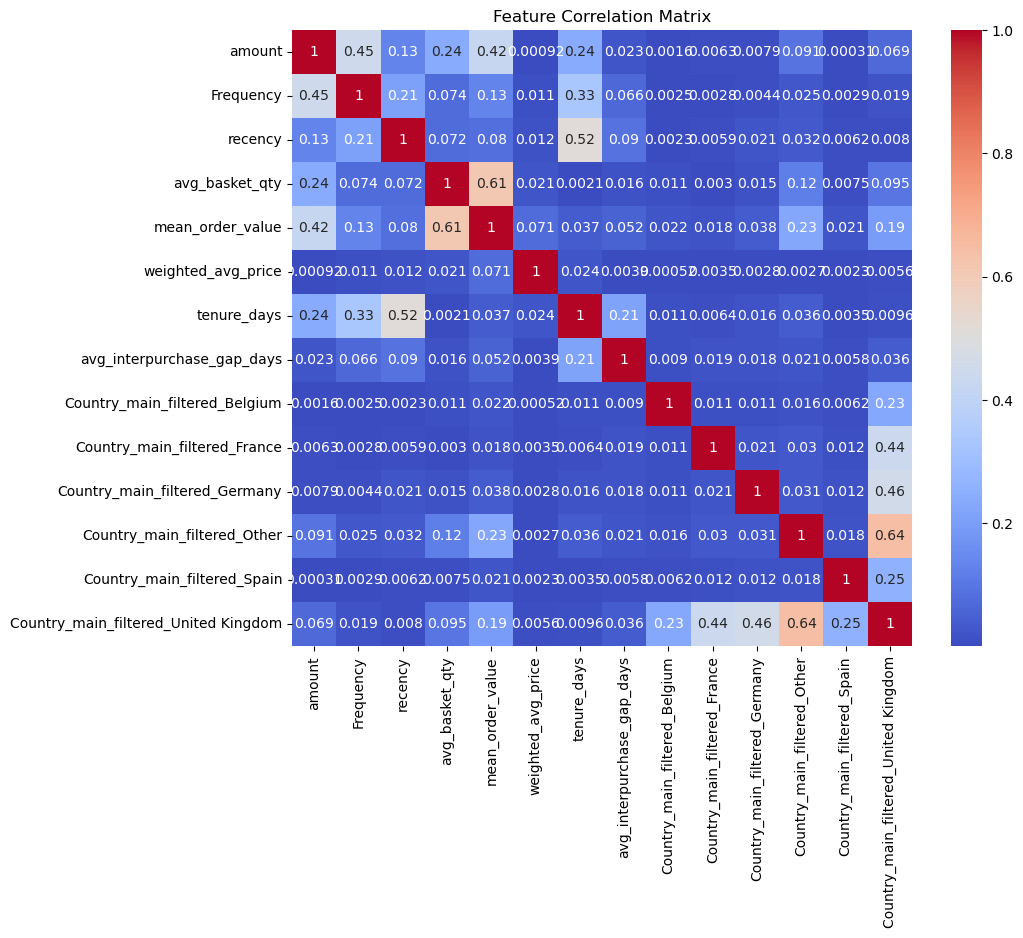

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr_matrix = final_features.corr().abs()

# visualize (optional)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [41]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print("Highly correlated features to drop:", to_drop)

Highly correlated features to drop: []


In [45]:
from sklearn.feature_selection import VarianceThreshold
# Assuming final_features contains only numeric columns
selector = VarianceThreshold(threshold=0.01)  # removes near-constant features
selector.fit(final_features)

selected_columns = final_features.columns[selector.get_support()]
print("Selected columns (after low variance filter):")
print(selected_columns)

Selected columns (after low variance filter):
Index(['amount', 'Frequency', 'recency', 'avg_basket_qty', 'mean_order_value',
       'weighted_avg_price', 'tenure_days', 'avg_interpurchase_gap_days',
       'Country_main_filtered_France', 'Country_main_filtered_Germany',
       'Country_main_filtered_Other', 'Country_main_filtered_United Kingdom'],
      dtype='object')


In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)  # keep 90% variance
X_pca = pca.fit_transform(final_features)
print("Number of components retained:", pca.n_components_)

Number of components retained: 7


In [48]:
print(X_pca)

[[-2.06769871 -0.93676932 -0.84016431 ...  1.22543903  0.04999356
   0.64492058]
 [ 1.83517732  0.62401387  0.32885226 ... -0.69759254 -0.07412951
   0.81166409]
 [ 1.02360671 -0.01674874  1.14326881 ... -0.20167895  0.25267296
   0.8119964 ]
 ...
 [-0.48781726  0.98968828  0.41618494 ... -0.1536346  -0.23517128
  -0.68002444]
 [ 1.69009832  1.9622764  -1.54982745 ...  0.04526069  1.53867161
   0.10926379]
 [ 0.92533485 -0.58709771  0.61574679 ... -0.61593297  0.17937033
   0.02196791]]
